# 26-1 1주차 스터디 -2 
### 딥러닝 파이토치 교과서의 06 ~ 08단원의 딥러닝 입문
### 교재 github 코드를 참고하여 코딩

## 06 DL 입문 - 인공신경망

### 1) 단층 퍼셉트론을 이용한 XOR 문제 풀기

In [2]:
import torch
import torch.nn as nn

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [4]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [5]:
linear = nn.Linear(2, 1, bias=True) # 1개의 뉴런을 가지고 단층 퍼셉트론 구현
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [6]:
# 비용함수와 옵티마이저 저의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [7]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: # 100번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273973822593689
100 0.6931476593017578
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

200번 이후 부터는 비용이 줄어들지 않는 것을 확인할 수 있음 -> 단층 퍼셉트론으로는 XOR 문제를 풀 수 없음

In [8]:
# 예측값 확인
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


### 2) 다층 퍼셉트론을 이용한 XOR 문제 풀기

In [9]:
import torch
import torch.nn as nn

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [11]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [12]:
# 입력층, 은닉층1,2,3 출력층을 가지는 인공 신경망
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

In [13]:
criterion = torch.nn.BCELoss().to(device) # 이진 크로스 엔트로피 비용 함수
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [14]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535601615906
300 0.6931513547897339
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931197047233582
2000 0.6931172609329224
2100 0.6931145191192627
2200 0.6931115984916687
2300 0.6931085586547852
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930879950523376
2900 0.6930825114250183
3000 0.6930763721466064
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.6930283904075623
3600 0.6930132508277893
3700 0.6929951310157776
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928648948669434
4200 

In [15]:
# 예측값 확인
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.1173286e-04]
 [9.9982870e-01]
 [9.9984217e-01]
 [1.8531107e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


### 1) 숫자 필기 데이터셋

In [35]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits # 사이킷런 패키지에서 제공하는 분류용 예제 데이터인 숫자 필기 데이터
digits = load_digits()                   # 1,979개의 이미지 데이터 로드

In [18]:
print(digits.images[0]) # 첫 번째 이미지 데이터 출력 8x8 행렬

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [19]:
print(digits.target[0]) # 첫 번째 이미지 데이터의 레이블 출력 0

0


In [20]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


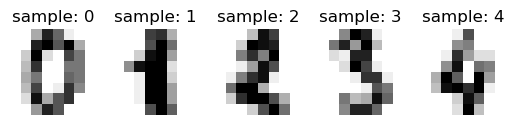

In [23]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)
plt.show()

In [24]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블: ', digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [25]:
# digits.data는 8x8 이미지 데이터를 64차원의 벡터 데이터로 변환한 데이터셋
print(digits.data[0]) # 첫 번째 이미지 데이터 출력

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [26]:
X = digits.data # 이미지, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블, 즉 정답 행렬

### 2) 다층 퍼셉트론 분류기 만들기

In [27]:
import torch
import torch.nn as nn
from torch import optim # 최적화 알고리즘이 구현된 패키지

In [28]:
# 모델 정의: 순차적인 레이어 구조
model = nn.Sequential(
    nn.Linear(64, 32), # 입력층: 64, 첫 번째 은닉층: 32
    nn.ReLU(),         # 활성화 함수: ReLU
    nn.Linear(32, 16), # 첫 번째 은닉층: 32, 두 번째 은닉층: 16
    nn.ReLU(),         # 활성화 함수: ReLU
    nn.Linear(16, 10)  # 두 번째 은닉층: 16, 출력층: 10 (클래스의 개수)
)

In [29]:
# 입력 데이터 X와 레이블 Y를 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [30]:
# 비용 함수 선택 -> "예측값과 정답을 어떻게 비교해서 오차를 계산할지"를 정의
loss_fn = nn.CrossEntropyLoss() # 이 비용함수는 소프트맥스 함수와 크로스 엔트로피 손실 함수를 포함

In [31]:
# 모델의 가중치를 어떠한 알고리즘으로 업데이트 할지 정의
optimizer = optim.Adam(model.parameters())

In [32]:
losses = [] # 학습 과정에서의 비용을 저장할 리스트

In [33]:
# 총 100번의 에포크 동안 모델 학습
for epoch in range(100):
  optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
  y_pred = model(X)          # 순전파 연산으로 예측값 계산
  loss = loss_fn(y_pred, Y)  # 손실 함수로 비용 계산
  loss.backward()            # 역전파 연산으로 기울기 계산
  optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

  # 10번째 에포크마다 현재 에포크와 손실 값 출력
  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  # 손실 값을 리스트에 추가하여 추적
  losses.append(loss.item())

Epoch    0/100 Cost: 2.381846
Epoch   10/100 Cost: 2.086940
Epoch   20/100 Cost: 1.844468
Epoch   30/100 Cost: 1.555474
Epoch   40/100 Cost: 1.246410
Epoch   50/100 Cost: 0.968091
Epoch   60/100 Cost: 0.724376
Epoch   70/100 Cost: 0.519714
Epoch   80/100 Cost: 0.380597
Epoch   90/100 Cost: 0.293385


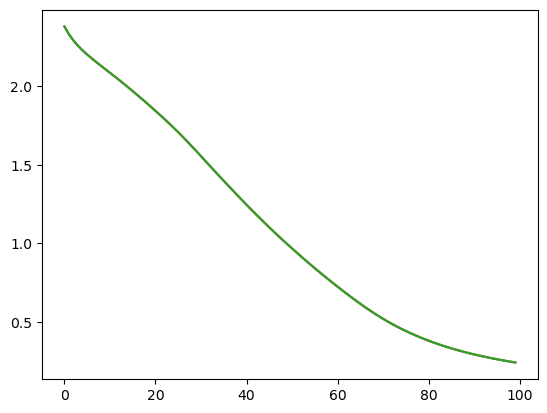

In [37]:
plt.plot(losses)
plt.show()

## 다층 퍼셉트론으로 MNIST 분류하기

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml # 사이킷런 패키지에서 제공하는 MNIST 데이터셋 로드 함수

In [55]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [56]:
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [57]:
mnist.target[0]

'5'

In [58]:
mnist.target = mnist.target.astype(np.int8)

In [59]:
X = mnist.data / 255 # 픽셀 값을 0~1 사이의 값으로 정규화 -> 학습 효율을 높이기 위해 수행
y = mnist.target

In [60]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [61]:
y[0]

5

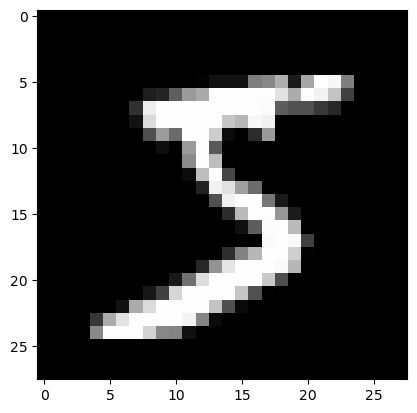

이 이미지 데이터의 레이블은 5이다


In [62]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.show()
print('이 이미지 데이터의 레이블은 {:.0f}이다'.format(y[0]))

In [63]:
### 훈련 데이터와 테스트 데이터의 분리
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

In [65]:
# 텐서로 변환
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# TensorDataset 객체 생성
ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

# DataLoader 객체 생성
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [66]:
### 다층 퍼셉트론
from torch import nn, optim

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [67]:
# 오차함수 선택
loss_fn = nn.CrossEntropyLoss()

# 가중치를 학습하기 위한 최적화 기법 선택
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [68]:
# 총 3번의 에포크 동안 모델 학습
epochs = 3

for epoch in range(epochs):
  for data, targets in loader_train:
    optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
    y_pred = model(data)          # 순전파 연산으로 예측값 계산
    loss = loss_fn(y_pred, targets)  # 손실 함수로 비용 계산
    loss.backward()            # 역전파 연산으로 기울기 계산
    optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

  print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch + 1, 3, loss.item()))

Epoch    1/3 Cost: 0.072343
Epoch    2/3 Cost: 0.235304
Epoch    3/3 Cost: 0.013980


In [69]:
model.eval()  # 신경망을 추론 모드로 전환
correct = 0

# 데이터로더에서 미니배치를 하나씩 꺼내 추론을 수행
with torch.no_grad():  # 추론 과정에는 미분이 필요없음
    for data, targets in loader_test:

        outputs = model(data)  # 데이터를 입력하고 출력을 계산

        # 추론 계산
        _, predicted = torch.max(outputs.data, 1)  # 확률이 가장 높은 레이블이 무엇인지 계산
        correct += predicted.eq(targets.data.view_as(predicted)).sum()  # 정답과 일치한 경우 정답 카운트를 증가

# 정확도 출력
data_num = len(loader_test.dataset)  # 데이터 총 건수
print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))


테스트 데이터에서 예측 정확도: 9642/10000 (96%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


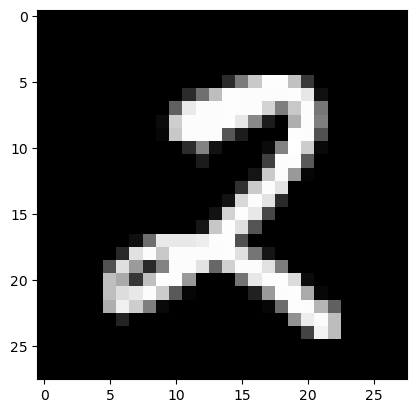

In [72]:
index = 2018

model.eval()  # 신경망을 추론 모드로 전환
data = X_test[index]
output = model(data)  # 데이터를 입력하고 출력을 계산
_, predicted = torch.max(output.data, 0)  # 확률이 가장 높은 레이블이 무엇인지 계산

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(y_test[index]))
plt.show()

### 파이썬으로 RNN 구현하기

In [73]:
import numpy as np

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [74]:
print(hidden_state_t) # 8의 크기를 가진 0 벡터 출력

[0. 0. 0. 0. 0. 0. 0. 0.]


In [75]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [76]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [77]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.95671935 0.83531845 0.95895126 0.98308409 0.73169867 0.87658014
  0.87292602 0.97982808]
 [0.99915379 0.99993614 0.99999219 0.99996059 0.99892849 0.99973691
  0.9999633  0.99997755]
 [0.99962035 0.99997482 0.99999852 0.99999067 0.9997361  0.99990984
  0.99998787 0.9999931 ]
 [0.99962352 0.9999787  0.99999742 0.99998106 0.99982867 0.99992876
  0.99998393 0.99999157]
 [0.99989361 0.99996995 0.99999957 0.99998965 0.99981797 0.99994521
  0.99998556 0.99999572]
 [0.99936411 0.99997993 0.99999722 0.9999891  0.9998415  0.99992586
  0.99998745 0.99998886]
 [0.99986349 0.99996749 0.99999937 0.99998451 0.99978485 0.99993796
  0.99998244 0.99999435]
 [0.99989538 0.99998168 0.99999922 0.99998856 0.99990632 0.99995871
  0.99998726 0.99999665]
 [0.9998679  0.99995273 0.99999902 0.99993401 0.99971464 0.99993389
  0.99996151 0.99998955]
 [0.99975499 0.99997893 0.99999881 0.99998942 0.99987843 0.99994696
  0.999987   0.99999334]

### 파이토치의 nn.RNN()

In [94]:
import torch
import torch.nn as nn

In [95]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

In [96]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [97]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

In [98]:
outputs, _status = cell(inputs)

In [99]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [100]:
print(_status.shape) # 최종 time-step의 hidden_state

torch.Size([1, 1, 8])


### 깊은 순환 신경망

In [101]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [102]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # 2개의 RNN 층을 쌓음

In [103]:
outputs, _status = cell(inputs)

In [104]:
print(outputs.shape) # 모든 time-step의 hidden_state

torch.Size([1, 10, 8])


In [105]:
print(_status.shape) # (층의 개수, 배치 크기, 은닉 상태의 크기)

torch.Size([2, 1, 8])


### 양방향 순환 신경망

In [106]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [107]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True)

In [108]:
outputs, _status = cell(inputs)

In [109]:
print(outputs.shape) # (배치 크기, 시퀀스 길이, 은닉 상태의 크기 x 2)

torch.Size([1, 10, 16])


In [110]:
print(_status.shape) # (층의 개수 x 2, 배치 크기, 은닉 상태의 크기)

torch.Size([4, 1, 8])


### 파이토치의 nn.LSTM()

In [112]:
import torch
import torch.nn as nn

In [113]:
input_dim = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

In [114]:
nn.RNN(input_dim, hidden_size, batch_first=True)

RNN(5, 8, batch_first=True)

In [115]:
nn.LSTM(input_dim, hidden_size, batch_first=True)

LSTM(5, 8, batch_first=True)

### 파이토치의 nn.GRU()

In [116]:
nn.RNN(input_dim, hidden_size, batch_first=True)

RNN(5, 8, batch_first=True)

In [117]:
nn.GRU(input_dim, hidden_size, batch_first=True)

GRU(5, 8, batch_first=True)